In [211]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Instalações

In [212]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as FF
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

# EDA

In [213]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [214]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [215]:
#Formato exemplo que tem que ser submitado com o arquivo de teste
pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [216]:
train.shape

(1460, 81)

In [217]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [218]:
#Sumarização estatística dos dados
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [219]:
#Verifica a distribuição dos dados, igual a zero é simetrica, maior que zero os dados estão mais para direita(positivamente), menor que zero os dados estão mais para a esquerda(negativamente).
#média acima da mediana = Positivo
#média abaixo da mediana = Negativo
#Em casos de dados muito assimetricos, pode ser melhor utilizar a mediana invès da média
# Subconjunto para colunas numéricas
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Calcular a skewness apenas para colunas numéricas
skewness_numeric = numeric_columns.skew()

# Exibir resultados
print(skewness_numeric)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

Dados muito positivos
- LotArea
- LowQualFinSF
- 3SsnPorch
- PoolArea
- MiscVal

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Visão Inicial das Características

In [221]:
train.dtypes.value_counts()


object     43
int64      35
float64     3
Name: count, dtype: int64

In [222]:
feat_categorical_nunique = train.select_dtypes(include='object').nunique()

In [223]:
feat_categorical_nunique.sum()

251

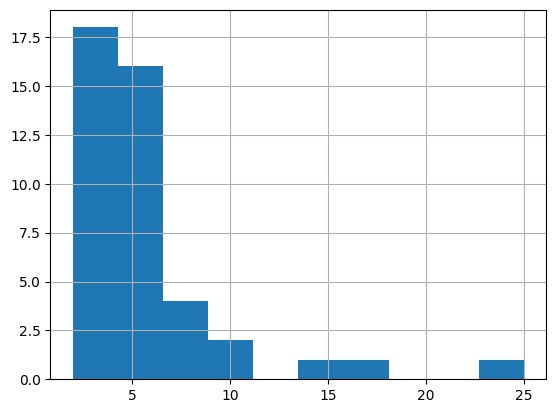

In [224]:
feat_categorical_nunique.hist();

In [225]:
# categorical features para one-hot-encode
feat_categorical_small = list(feat_categorical_nunique[feat_categorical_nunique < 7].index)

In [226]:
# Quantidade de catgorias
len(feat_categorical_small)

34

In [227]:
pip install nbresult

Note: you may need to restart the kernel to use updated packages.


In [228]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'features_overview',
    n=len(feat_categorical_small)
)

In [229]:
result

In [230]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'features_overview',
    n=len(feat_categorical_small)
)

result.write()

NameError: Could not find /tests directory in any parent folder

## Tratamento de Valores Nulos

In [ ]:
print(train.isna().sum(), test.isna().sum())

In [ ]:
# Lista dos valores nulos
na_values = list(train.isna().sum())

# Lista para armazenar informações sobre as features
lst = []
i = 0

# Loop sobre as colunas do DataFrame
for feature in train.columns:
    # Obtém o tipo da feature
    feature_type = train[feature].dtype
    
    # Cria uma lista com o nome da coluna, o valor nulo e o tipo
    insert_lst = [feature, na_values[i], feature_type]
    
    # Adiciona a lista à lista principal
    lst.append(insert_lst)
    
    # Incrementa o índice para acessar o próximo valor nulo
    i += 1

# Cria um DataFrame a partir da lista
na_df = pd.DataFrame(data=lst, columns=['Column', 'Na_value', 'Feature_type'])

In [ ]:
na_df[na_df['Na_value'] > 0].sort_values(by='Na_value',ascending = False )

In [ ]:
fig = px.bar(na_df.sort_values(by='Na_value'),x='Na_value',y='Column',
             orientation='h',height=1500,width=900,color='Na_value',text='Na_value',title='Na Values')
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
#Para os dados de Teste
# Lista dos valores nulos
na_values_test = list(test.isna().sum())

# Lista para armazenar informações sobre as features
lst = []
i = 0

# Loop sobre as colunas do DataFrame
for feature in test.columns:
    # Obtém o tipo da feature
    feature_type = test[feature].dtype
    
    # Cria uma lista com o nome da coluna, o valor nulo e o tipo
    insert_lst = [feature, na_values_test[i], feature_type]
    
    # Adiciona a lista à lista principal
    lst.append(insert_lst)
    
    # Incrementa o índice para acessar o próximo valor nulo
    i += 1

# Cria um DataFrame a partir da lista
na_df_test = pd.DataFrame(data=lst, columns=['Column', 'Na_value', 'Feature_type'])

In [ ]:
na_df_test[na_df_test['Na_value'] > 0].sort_values(by='Na_value',ascending = False )

## Tratamento para valores numéricos
- Como explicado na análise do skew, caso exista muitos outliers, é melhor substituir pela mediana, já que a média é interferida pelos outliers


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



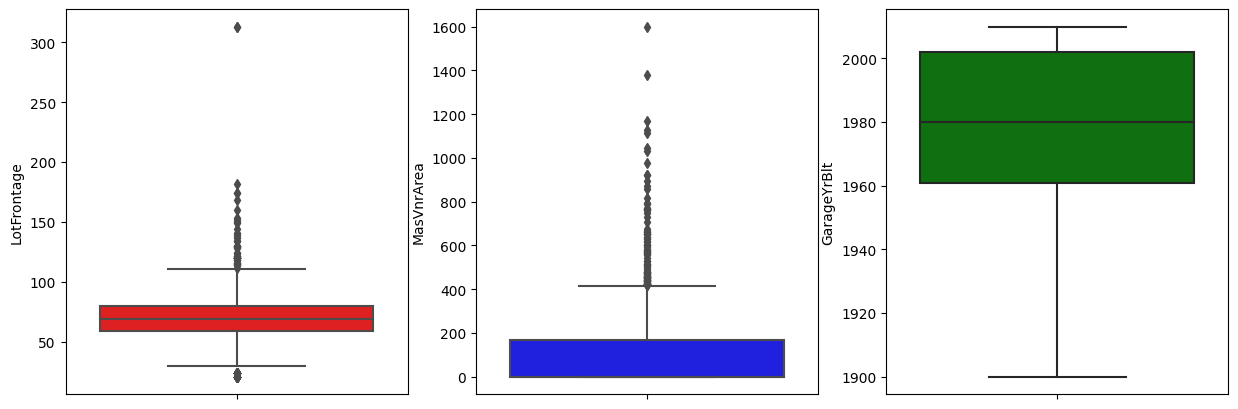

In [231]:
plt.figure(figsize=(15,5))

features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = train[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

#### Conclusão: Serão substituídos pela mediana pela quantidade de outliers(MasVnrArea,LotFrontage) e pela média(LotFrontage)

In [232]:
#Validação, perceptível a diferença entre a média e a mediana, sendo a média maior que a mediana
print(train['LotFrontage'].mean(), train['LotFrontage'].median())
print(train['MasVnrArea'].mean(), train['MasVnrArea'].median())
print(train['LotFrontage'].mean(), train['GarageYrBlt'].median())

70.04995836802665 69.0
103.68526170798899 0.0
70.04995836802665 1980.0


In [233]:
features_select_median = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in features_select_median:
    train[col].fillna(train[col].median(), inplace = True)


In [234]:
view_na_select = ['LotFrontage','MasVnrArea', 'LotFrontage']
train[view_na_select].isna().sum()

LotFrontage    0
MasVnrArea     0
LotFrontage    0
dtype: int64

In [235]:
#Fazer para os arquivo de teste
features_select_median = ['LotFrontage','MasVnrArea']
for col in features_select_median:
    test[col].fillna(test[col].median(), inplace = True)

In [236]:
view_na_select = ['LotFrontage','MasVnrArea', 'LotFrontage']
test[view_na_select].isna().sum()

LotFrontage    0
MasVnrArea     0
LotFrontage    0
dtype: int64

## Tratamento para valores categóricos

In [237]:
#Colunas categoricas
features_cat = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

PoolQC,MiscFeature,Alley and Fence são as com mais valores nulos

In [238]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [239]:
print(train['PoolQC'].value_counts())
print(train['MiscFeature'].value_counts())
print(train['Alley'].value_counts())
print(train['Fence'].value_counts())

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64


In [240]:
len(train['PoolQC'])

1460

Como a existe uma quantidade muito grando de valores nulos nestas colunas, será melhor dropar elas.

In [241]:
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [242]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

Metade dos dados são nulos. Além disso, existe um padrão em relação aos valores nulos, normalmente são colocados quando a casa não tem FirePlace

In [243]:
train['FireplaceQu'].fillna('No', inplace = True)
test['FireplaceQu'].fillna('No', inplace = True)

In [244]:
#Colunas categoricas
features_cat = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','GarageType','GarageFinish',
 'GarageQual','GarageCond']

In [245]:
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [246]:
#A coluna MasVnrType é relacionada a MasVnrArea
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [247]:
train['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [248]:
#Parece que os valores Nulos sao correspondentes quando não existe informação com a coluna correlata
train['MasVnrType'].fillna('No', inplace = True)

In [249]:
test['MasVnrType'].fillna('No', inplace = True)

In [250]:
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [251]:
#Os valores nulos são postos quando não há informação sobre os outros Basement
train[train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [252]:
#Mesmo motivo da coluna anterior
bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for feature in bsmt:
    train[feature].fillna('No', inplace = True)
    test[feature].fillna('No', inplace = True)


In [253]:
train['Electrical'].isna().sum()

1

In [254]:
test['Electrical'].isna().sum()

0

In [255]:
train['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [256]:
train['Electrical'].fillna( 'SBrkr', inplace = True)

In [257]:
train[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [258]:
train[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [259]:
train[train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,1980.0,NaN,0,0,NaN,NaN
48,NaN,1980.0,NaN,0,0,NaN,NaN
78,NaN,1980.0,NaN,0,0,NaN,NaN
88,NaN,1980.0,NaN,0,0,NaN,NaN
89,NaN,1980.0,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,1980.0,NaN,0,0,NaN,NaN
1407,NaN,1980.0,NaN,0,0,NaN,NaN
1449,NaN,1980.0,NaN,0,0,NaN,NaN
1450,NaN,1980.0,NaN,0,0,NaN,NaN


In [260]:
grg = ['GarageType','GarageFinish','GarageQual','GarageCond']
for feature in grg:
    train[feature].fillna('No', inplace = True)
    test[feature].fillna('No', inplace = True)

In [261]:
test.isna().sum().sum()

100

In [262]:
#Para os dados de Teste
# Lista dos valores nulos
na_values_test = list(test.isna().sum())

# Lista para armazenar informações sobre as features
lst = []
i = 0

# Loop sobre as colunas do DataFrame
for feature in test.columns:
    # Obtém o tipo da feature
    feature_type = test[feature].dtype
    
    # Cria uma lista com o nome da coluna, o valor nulo e o tipo
    insert_lst = [feature, na_values_test[i], feature_type]
    
    # Adiciona a lista à lista principal
    lst.append(insert_lst)
    
    # Incrementa o índice para acessar o próximo valor nulo
    i += 1

# Cria um DataFrame a partir da lista
na_df_test = pd.DataFrame(data=lst, columns=['Column', 'Na_value', 'Feature_type'])

In [263]:
na_df_test = na_df_test[na_df_test['Na_value'] > 0].sort_values(by='Na_value',ascending = False )
na_df_test

,Column,Na_value,Feature_type
58,GarageYrBlt,78,float64
2,MSZoning,4,object
8,Utilities,2,object
46,BsmtFullBath,2,float64
47,BsmtHalfBath,2,float64
54,Functional,2,object
22,Exterior1st,1,object
23,Exterior2nd,1,object
33,BsmtFinSF1,1,float64
35,BsmtFinSF2,1,float64


In [264]:
features_to_examine=na_df_test['Column'].unique().tolist()
features_to_examine

['GarageYrBlt',
 'MSZoning',
 'Utilities',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [265]:
cat = [col for col in features_to_examine if test[col].dtype=='O']

for feature in cat:
    test[feature] = test[feature].fillna(test[feature].mode()[0])
    
num = [col for col in features_to_examine if test[col].dtype!='O']

for feature in num:
    test[feature] = test[feature].fillna(test[feature].median())

In [266]:
test.isna().sum().sum()

0

In [267]:
train.isna().sum().sum()

0

In [268]:
df = train.copy()

## Normalização

### Normalização dos dados mais assimétricos positivos contínuos

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



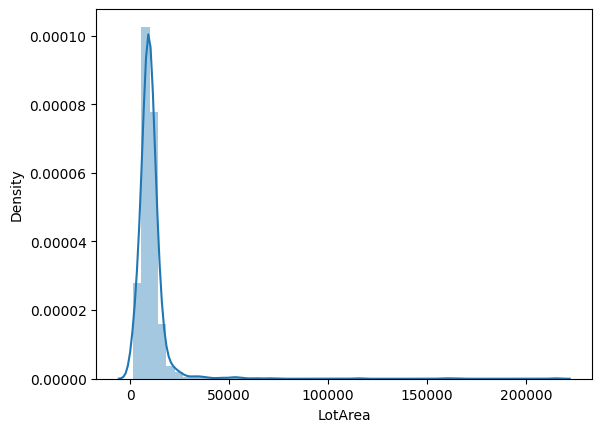

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



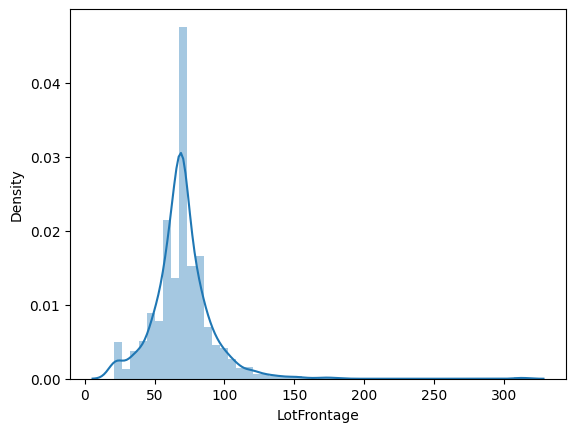

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



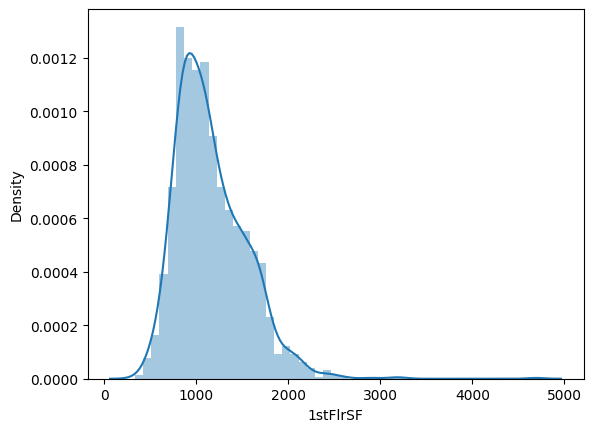

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



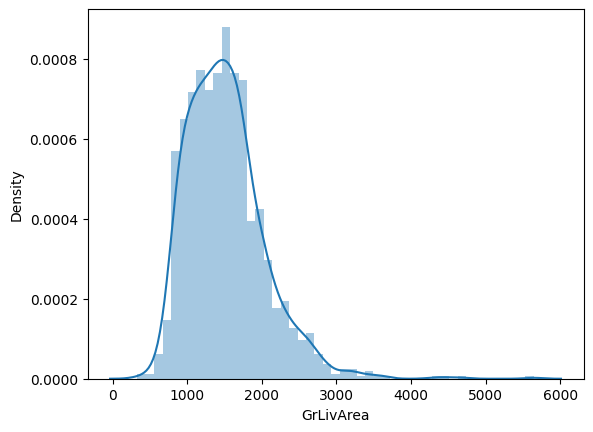

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



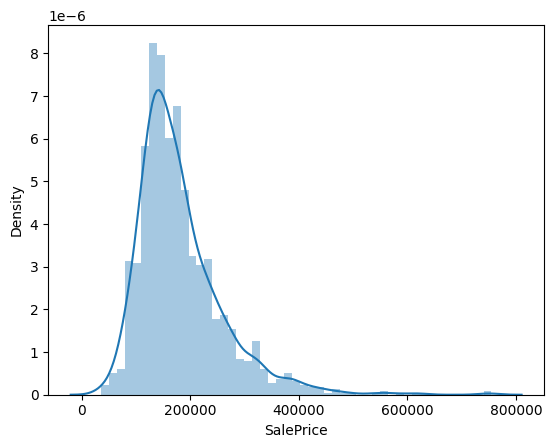

In [270]:
##Distribuição
features = ['LotArea','LotFrontage','1stFlrSF','GrLivArea', 'SalePrice']
for feature in features:
    fig = sns.distplot(df[feature])
    plt.show()

In [272]:
#Transformando em uma escala logarítimica
for feature in features:
    df[feature]=np.log1p(df[feature])

In [274]:
#Transformando em uma escala logarítimica
features2 = ['LotArea','LotFrontage','1stFlrSF','GrLivArea']
for feature in features2:
    test[feature]=np.log1p(test[feature])

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



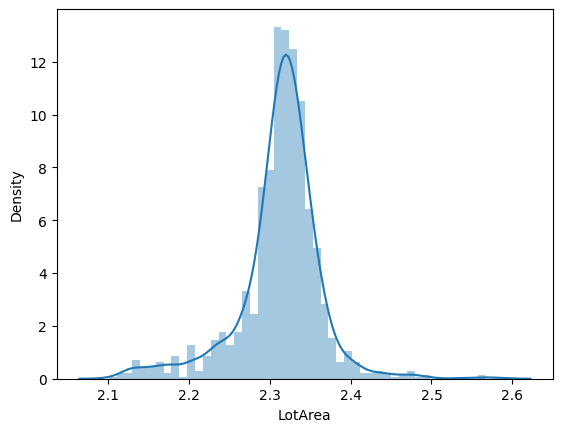

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



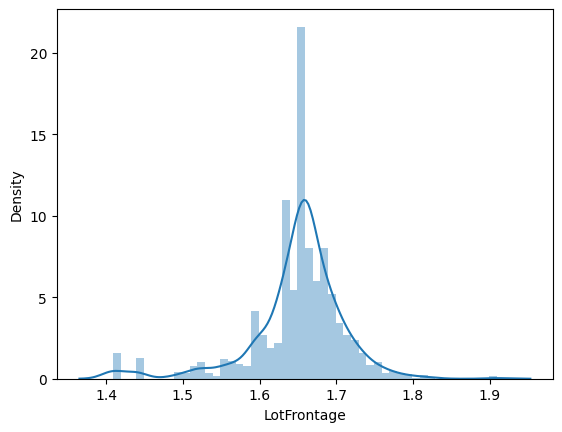

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



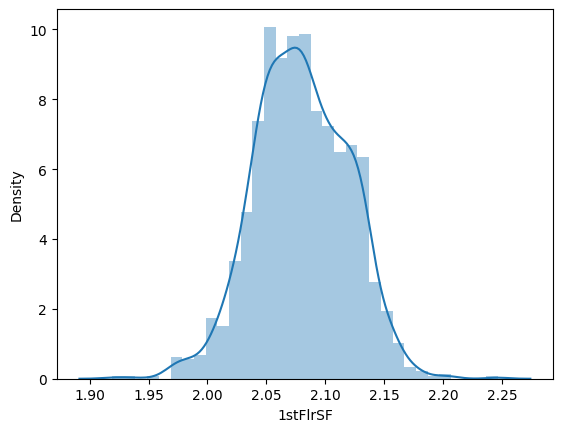

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



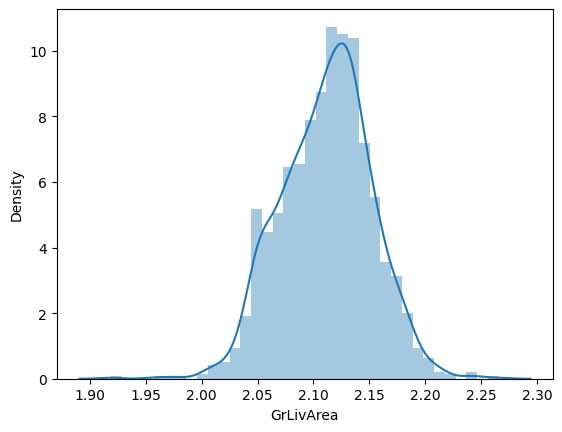

/tmp/ipykernel_42/2571860292.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



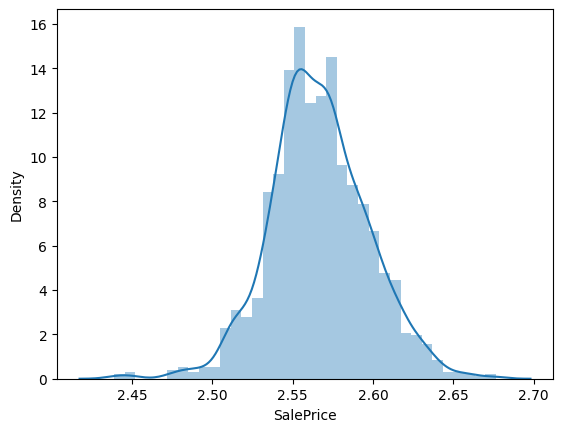

In [275]:
##Distribuição
features = ['LotArea','LotFrontage','1stFlrSF','GrLivArea', 'SalePrice']
for feature in features:
    fig = sns.distplot(df[feature])
    plt.show()

#### Irei fazer o MinMax após a divisão de treino e validação para evitar vazamento

### Normalização dos dados categóricos

In [276]:
categorical = []

for col in df.columns:
    if df[col].dtype=='O':
        categorical.append(col)

In [277]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [278]:
df[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,4,3,6,6,1,0,1,4,3,6,5,1,2,5,5,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,4,3,0,5,1,4,1,4,3,2,5,1,3,5,5,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,4,1,3,2,6,1,0,1,4,2,6,2,1,2,5,5,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,4,4,2,2,5,1,2,1,0,2,6,3,1,3,5,5,2,8,4


In [279]:
##Label Encoding Test
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [280]:
test[categorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,4,4,3,5,3,0,4,1,3,3,6,3,1,3,4,5,2,8,4
1,3,1,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,4,4,3,0,6,0,4,1,3,2,6,3,1,3,4,5,2,8,4
2,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,4,3,2,6,0,2,1,3,3,6,5,1,0,4,5,2,8,4
3,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,4,4,3,2,6,0,0,1,3,2,6,2,1,0,4,5,2,8,4
4,3,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,4,3,0,6,0,0,1,3,2,6,3,1,2,4,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,3,4,1,0,5,5,2,3,4,1,4,4,3,6,6,0,2,1,3,3,6,3,6,1,2,3,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,4,4,1,0,5,5,2,3,4,1,4,4,3,5,6,0,4,1,3,3,6,3,4,3,4,5,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,0,2,1,0,10,12,2,3,4,1,4,4,3,0,6,0,0,1,3,3,6,5,5,3,4,5,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,0,5,1,0,6,14,2,3,4,2,2,4,0,2,6,0,4,1,3,3,6,3,6,1,2,3,2,8,4


## Correlação

In [121]:
correlation_matrix_pearson = df.corr(method='pearson')

In [122]:
correlation_matrix_spearman = df.corr(method='spearman')

In [123]:
correlation_matrix_pearson

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.017254,-0.017483,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.051971,-0.051071,0.001689,0.029826,0.008514,0.047668,0.007223,-0.024613,0.016616,-0.005024,0.045877,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.037632,0.009417,0.005590,-0.044230,0.004185,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,0.003765,-0.007822,-0.000122,-0.004626,0.016570,0.017634,0.001955,-0.008379,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.017942
MSSubClass,0.011156,1.000000,0.035900,-0.475733,-0.462639,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.023573,-0.017161,-0.003254,0.058126,-0.081702,-0.017905,-0.064221,0.006437,-0.069836,0.037025,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.288573,0.307886,0.046474,0.081715,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.050200,0.133138,0.081396,-0.028806,-0.040110,-0.098672,-0.038571,-0.045895,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.073959
MSZoning,-0.006096,0.035900,1.000000,-0.132021,-0.098809,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.062830,0.200536,-0.096041,-0.235174,0.160778,-0.011450,0.037209,0.026347,-0.049128,-0.034004,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.061578,-0.051481,0.011520,-0.103569,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.002491,0.141142,-0.263772,0.117559,-0.157042,-0.189250,-0.162998,-0.102744,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.188861
LotFrontage,-0.017254,-0.475733,-0.132021,1.000000,0.652386,-0.034418,-0.157159,-0.051455,0.002836,-0.170135,0.060009,0.106165,0.000791,0.002880,-0.530894,-0.017025,0.205269,-0.031893,0.087589,0.059305,0.163370,0.067178,0.100143,0.134826,-0.029646,0.141366,-0.161482,0.037117,0.091596,-0.109637,0.047474,-0.106520,-0.007622,0.166679,-0.021996,0.038646,0.140640,0.329151,-0.018104,-0.075463,0.053500,0.038033,0.422361,0.046953,0.024742,0.321113,0.066453,-0.002614,0.163491,0.016911,0.267495,0.013516,-0.162876,0.319716,0.039341,0.224459,-0.001842,-0.272321,0.039638,-0.141279,0.273091,0.317798,0.090712,0.088636,0.078597,0.088192,0.123286,0.017847,0.063673,0.050937,0.108413,0.011067,0.019878,0.004429,-0.023721,0.063641,0.346237
LotArea,-0.017483,-0.462639,-0.098809,0.652386,1.000000,-0.105732,-0.285426,-0.104671,0.023404,-0.187108,0.255902,0.104680,0.058579,0.028730,-0.564911,-0.045559,0.178220,-0.006308,0.021943,0.027672,0.142940,0.173393,0

In [124]:
correlation_matrix_spearman

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.019226,-0.023256,-0.032951,-0.005364,0.008916,0.029786,-0.016388,0.013324,0.046672,0.018709,-0.012134,-0.011649,0.029564,0.018940,0.017236,-0.028771,0.003622,-0.005130,-0.011680,0.036260,-0.027772,-0.037444,-0.041372,0.049492,-0.036547,-0.007756,0.024854,0.004293,0.043753,0.009216,-0.027117,0.013398,-0.013038,0.014275,-0.006736,-0.009509,-0.033187,0.025571,0.000450,0.009821,0.043082,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,-0.010577,0.025888,-0.002164,-0.013644,0.001280,-0.005776,-0.003242,-0.005707,0.013301,0.006505,0.006435,-0.001130,0.000583,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,0.026916,-0.013279,-0.018546
MSSubClass,0.019226,1.000000,0.127902,-0.280102,-0.269570,-0.017276,0.070499,-0.003433,-0.029594,0.044672,-0.020405,-0.009138,-0.012502,-0.029796,0.653656,0.532531,0.108065,-0.071770,0.035848,0.006802,-0.142499,-0.018905,-0.062801,-0.086449,-0.057084,0.025821,-0.051949,0.013105,0.075064,-0.119979,-0.035714,-0.072857,0.079219,-0.107629,0.064829,-0.083871,-0.117603,-0.318897,0.062299,0.001155,-0.107115,0.045342,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,-0.029872,0.165825,0.030564,0.019480,0.072479,0.139092,0.080487,-0.048026,0.024226,-0.047133,-0.066934,-0.069480,-0.060101,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.047649,-0.062102,0.007192
MSZoning,-0.023256,0.127902,1.000000,-0.246039,-0.219857,0.036386,0.146903,0.005214,-0.005542,0.018445,-0.027908,-0.205514,-0.069010,0.016397,0.104300,-0.115689,-0.211704,0.185306,-0.351046,-0.203277,-0.027856,-0.014347,0.013254,0.028019,0.018012,-0.087243,0.237670,-0.119523,-0.261234,0.188668,-0.013779,0.074582,0.089282,-0.130938,0.006356,-0.005531,-0.023797,-0.202015,0.098549,0.152425,-0.115791,-0.117595,-0.170373,-0.012445,0.035994,-0.155742,-0.070691,-0.010736,-0.244242,-0.140018,-0.082698,0.049793,0.182676,-0.094765,-0.092504,-0.089560,-0.009897,0.235460,-0.270806,0.189404,-0.209286,-0.245069,-0.194779,-0.143375,-0.175998,-0.074033,-0.179684,0.188686,-0.015166,-0.009615,-0.014692,0.002700,-0.035685,-0.016242,0.130390,-0.094488,-0.334909
LotFrontage,-0.032951,-0.280102,-0.246039,1.000000,0.554082,-0.027758,-0.122277,0.003816,-0.000312,-0.141465,0.025487,0.119372,-0.000420,0.019070,-0.375115,0.105783,0.230305,-0.072772,0.185331,0.101659,0.171241,0.059405,0.013193,0.019582,-0.102119,0.242800,-0.155900,0.080596,0.099842,-0.115617,0.107375,-0.132818,-0.060877,0.150312,-0.027022,0.052350,0.097988,0.352150,-0.047940,-0.065952,0.119841,0.096436,0.384900,0.045055,-0.034600,0.329049,0.078139,0.000334,0.193805,0.093098,0.291727,-0.005666,-0.144937,0.319740,0.024949,0.212638,-0.024377,-0.317767,0.094418,-0.189915,0.325207,0.343772,0.150742,0.145063,0.155875,0.101321,0.152614,-0.099960,0.052856,0.039848,0.076728,0.022408,0.022914,0.001682,-0.093651,0.106162,0.375590
LotArea,-0.005364,-0.269570,-0.219857,0.554082,1.000000,-0.053676,-0.310579,-0.080551,0.036246,-0.195843,0.116919,0.093409,0.087936,0.047150,-0.425651,0.060966,0.233303,-0.046912,0.103385,0.075158,0.138782,0.142307,0.06

In [125]:
correlation_matrix_spearman

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.019226,-0.023256,-0.032951,-0.005364,0.008916,0.029786,-0.016388,0.013324,0.046672,0.018709,-0.012134,-0.011649,0.029564,0.018940,0.017236,-0.028771,0.003622,-0.005130,-0.011680,0.036260,-0.027772,-0.037444,-0.041372,0.049492,-0.036547,-0.007756,0.024854,0.004293,0.043753,0.009216,-0.027117,0.013398,-0.013038,0.014275,-0.006736,-0.009509,-0.033187,0.025571,0.000450,0.009821,0.043082,-0.000616,0.009455,-0.028463,0.002812,0.004662,-0.021475,0.007269,0.002564,0.041650,0.007574,-0.010577,0.025888,-0.002164,-0.013644,0.001280,-0.005776,-0.003242,-0.005707,0.013301,0.006505,0.006435,-0.001130,0.000583,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,0.026916,-0.013279,-0.018546
MSSubClass,0.019226,1.000000,0.127902,-0.280102,-0.269570,-0.017276,0.070499,-0.003433,-0.029594,0.044672,-0.020405,-0.009138,-0.012502,-0.029796,0.653656,0.532531,0.108065,-0.071770,0.035848,0.006802,-0.142499,-0.018905,-0.062801,-0.086449,-0.057084,0.025821,-0.051949,0.013105,0.075064,-0.119979,-0.035714,-0.072857,0.079219,-0.107629,0.064829,-0.083871,-0.117603,-0.318897,0.062299,0.001155,-0.107115,0.045342,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,-0.029872,0.165825,0.030564,0.019480,0.072479,0.139092,0.080487,-0.048026,0.024226,-0.047133,-0.066934,-0.069480,-0.060101,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.047649,-0.062102,0.007192
MSZoning,-0.023256,0.127902,1.000000,-0.246039,-0.219857,0.036386,0.146903,0.005214,-0.005542,0.018445,-0.027908,-0.205514,-0.069010,0.016397,0.104300,-0.115689,-0.211704,0.185306,-0.351046,-0.203277,-0.027856,-0.014347,0.013254,0.028019,0.018012,-0.087243,0.237670,-0.119523,-0.261234,0.188668,-0.013779,0.074582,0.089282,-0.130938,0.006356,-0.005531,-0.023797,-0.202015,0.098549,0.152425,-0.115791,-0.117595,-0.170373,-0.012445,0.035994,-0.155742,-0.070691,-0.010736,-0.244242,-0.140018,-0.082698,0.049793,0.182676,-0.094765,-0.092504,-0.089560,-0.009897,0.235460,-0.270806,0.189404,-0.209286,-0.245069,-0.194779,-0.143375,-0.175998,-0.074033,-0.179684,0.188686,-0.015166,-0.009615,-0.014692,0.002700,-0.035685,-0.016242,0.130390,-0.094488,-0.334909
LotFrontage,-0.032951,-0.280102,-0.246039,1.000000,0.554082,-0.027758,-0.122277,0.003816,-0.000312,-0.141465,0.025487,0.119372,-0.000420,0.019070,-0.375115,0.105783,0.230305,-0.072772,0.185331,0.101659,0.171241,0.059405,0.013193,0.019582,-0.102119,0.242800,-0.155900,0.080596,0.099842,-0.115617,0.107375,-0.132818,-0.060877,0.150312,-0.027022,0.052350,0.097988,0.352150,-0.047940,-0.065952,0.119841,0.096436,0.384900,0.045055,-0.034600,0.329049,0.078139,0.000334,0.193805,0.093098,0.291727,-0.005666,-0.144937,0.319740,0.024949,0.212638,-0.024377,-0.317767,0.094418,-0.189915,0.325207,0.343772,0.150742,0.145063,0.155875,0.101321,0.152614,-0.099960,0.052856,0.039848,0.076728,0.022408,0.022914,0.001682,-0.093651,0.106162,0.375590
LotArea,-0.005364,-0.269570,-0.219857,0.554082,1.000000,-0.053676,-0.310579,-0.080551,0.036246,-0.195843,0.116919,0.093409,0.087936,0.047150,-0.425651,0.060966,0.233303,-0.046912,0.103385,0.075158,0.138782,0.142307,0.06

In [126]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [127]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.189655,9.042040,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,6.753438,854,0,7.444833,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,12.247699
1,2,20,3,4.394449,9.169623,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,7.141245,0,0,7.141245,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,5,2007,8,4,12.109016
2,3,60,3,4.234107,9.328212,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,6.825460,866,0,7.488294,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,12.317171
3,4,70,3,4.110874,9.164401,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,6.869014,756,0,7.448916,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0,11.849405
4,5,60,3,4.442651,9.565284,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,7.044033,1053,0,7.695758,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,12,2008,8,4,12.429220


In [128]:
df.shape

(1460, 77)

In [129]:
df.isna().sum().sum()

0

## Separação dos dados

In [130]:
features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
target = ['SalePrice']

In [131]:
from sklearn.model_selection import train_test_split as tts
X_train, X_val, y_train, y_val = tts(df[features], df[target], test_size=0.3, random_state=42)

## Normalização com MinMax

In [132]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_training = MinMaxScaler()
scaler = min_max_scaler_training.fit_transform(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [133]:
X_train = pd.DataFrame(scaler,columns=[features])

In [134]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.490307,0.406912,1.0,1.000000,1.0,0.0,1.00,0.0,0.583333,0.25,0.333333,0.0,0.285714,0.666667,0.625,0.710145,0.333333,0.6,0.142857,0.642857,0.666667,0.333333,0.208999,1.000000,1.0,0.4,1.0,1.00,1.000000,1.000000,0.000000,1.0,0.000000,0.558219,0.213421,0.2,0.5,1.0,1.0,0.611511,0.000000,0.0,0.571593,0.000000,0.0,0.666667,0.0,0.375,0.5,1.000000,0.416667,1.0,0.333333,0.4,0.166667,0.636364,1.000000,0.50,0.373766,1.0,1.0,1.0,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.50,1.000,0.8
1,0.941176,1.00,0.185256,0.203320,1.0,1.000000,1.0,0.0,1.00,0.0,0.291667,0.25,0.333333,1.0,1.000000,0.444444,0.500,0.963768,0.916667,0.2,0.142857,0.857143,0.866667,0.333333,0.058055,1.000000,1.0,0.4,0.5,1.00,0.333333,0.333333,0.096917,1.0,0.000000,0.000000,0.089525,0.2,0.5,1.0,1.0,0.440991,0.000000,0.0,0.412205,0.333333,0.0,0.333333,0.0,0.250,0.5,1.000000,0.250000,1.0,0.000000,0.6,0.333333,0.954545,0.000000,0.50,0.370240,1.0,1.0,1.0,0.000000,0.051188,0.0,0.0,0.0,0.0,0.0,0.363636,0.00,1.000,0.8
2,0.235294,0.25,0.451188,0.370623,1.0,1.000000,1.0,0.0,1.00,0.0,0.875000,0.25,0.333333,0.0,0.714286,0.666667,0.500,0.992754,0.983333,0.2,0.142857,0.857143,0.866667,0.666667,0.000000,1.000000,1.0,0.4,0.5,1.00,0.666667,0.333333,0.004252,1.0,0.000000,0.313356,0.123732,0.2,0.0,1.0,1.0,0.312818,0.379177,0.0,0.541985,0.000000,0.0,0.666667,0.5,0.375,0.5,0.666667,0.416667,1.0,0.000000,0.6,0.166667,0.990909,1.000000,0.50,0.433004,1.0,1.0,1.0,0.197200,0.082267,0.0,0.0,0.0,0.0,0.0,0.454545,1.00,0.250,0.8
3,0.000000,0.75,0.508439,0.429463,1.0,0.000000,1.0,0.0,0.00,0.0,0.875000,1.00,0.333333,0.0,0.285714,0.888889,0.500,0.971014,0.933333,0.6,0.142857,0.857143,0.466667,1.000000,0.219158,0.000000,1.0,0.4,0.0,0.25,1.000000,1.000000,0.000000,1.0,0.000000,0.815497,0.311784,0.2,0.0,1.0,1.0,0.658648,0.000000,0.0,0.615654,0.000000,0.0,0.666667,0.0,0.375,0.5,0.000000,0.500000,1.0,0.333333,0.4,0.166667,0.963636,0.000000,0.75,0.555712,1.0,1.0,1.0,0.000000,0.349177,0.0,0.0,0.0,0.0,0.0,0.181818,0.25,1.000,0.8
4,0.235294,0.75,0.260743,0.411873,1.0,0.333333,1.0,0.0,0.25,0.0,0.208333,0.50,0.333333,0.0,0.714286,0.666667,0.625,0.898551,0.766667,0.2,0.142857,0.857143,0.866667,0.666667,0.000000,0.666667,1.0,0.4,0.5,1.00,0.000000,0.333333,0.068214,0.0,0.305235,0.029966,0.130769,0.2,0.0,1.0,1.0,0.342798,0.403874,0.0,0.567147,0.333333,0.0,0.666667,0.5,0.375,0.5,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.872727,0.666667,0.50,0.387870,1.0,1.0,1.0,0.184364,0.111517,0.0,0.0,0.0,0.0,0.0,0.272727,0.75,0.625,0.8


In [135]:
X_train.isna().sum().sum()

0

In [136]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_training = MinMaxScaler()
scaler = min_max_scaler_training.fit_transform(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [137]:
X_val = pd.DataFrame(scaler,columns=[features])

In [138]:
X_val.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.564987,0.448253,1.0,1.0,1.000000,0.0,1.0,0.0,0.791667,0.285714,0.166667,0.0,0.285714,0.500,0.857143,0.656716,0.883333,0.75,0.0,0.428571,0.400000,0.666667,0.00000,1.000000,1.0,0.25,1.0,1.0,1.000000,0.333333,0.303016,1.0,0.0,0.183929,0.330318,0.0,1.0,1.0,1.0,0.444598,0.000000,0.0,0.363924,0.0,0.5,0.333333,0.0,0.500000,0.0,1.000000,0.333333,1.0,0.000000,0.6,0.166667,0.53,0.666667,0.25,0.189928,1.0,1.0,1.0,0.371373,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.8
1,0.235294,0.75,0.725296,0.545703,1.0,0.0,1.000000,0.0,0.0,0.0,0.625000,0.285714,0.166667,0.0,0.714286,0.750,0.428571,0.888060,0.750000,0.25,0.0,0.428571,0.400000,0.333333,0.22625,0.666667,1.0,0.50,0.0,1.0,0.000000,0.333333,0.471664,1.0,0.0,0.200186,0.456332,0.0,0.0,1.0,1.0,0.633552,0.599359,0.0,0.772953,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.666667,1.0,0.666667,1.0,0.166667,0.84,0.666667,0.50,0.512230,1.0,1.0,1.0,0.359768,0.063745,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,1.0,0.8
2,0.058824,1.00,0.459077,0.464542,1.0,1.0,1.000000,0.0,1.0,0.0,0.708333,0.000000,0.166667,0.0,0.285714,0.375,0.571429,0.388060,0.000000,0.25,0.0,1.000000,1.000000,0.666667,0.00000,1.000000,1.0,0.25,1.0,1.0,1.000000,1.000000,0.000000,1.0,0.0,0.468184,0.314410,0.0,0.5,1.0,0.0,0.423367,0.000000,0.0,0.346545,0.0,0.0,0.333333,0.0,0.333333,0.0,1.000000,0.222222,1.0,0.333333,0.4,0.833333,0.17,1.000000,0.50,0.258993,1.0,1.0,1.0,0.000000,0.000000,0.408805,0.0,0.0,0.0,0.0,0.181818,1.00,1.0,0.8
3,0.176471,1.00,0.405442,0.313412,1.0,1.0,1.000000,0.0,0.0,0.0,0.125000,0.142857,0.166667,0.0,0.000000,0.500,0.714286,0.537313,0.000000,0.25,0.0,0.357143,0.333333,0.666667,0.00000,1.000000,0.5,0.25,1.0,1.0,1.000000,0.000000,0.182358,1.0,0.0,0.281003,0.313163,0.0,0.0,1.0,1.0,0.410229,0.352564,0.0,0.565843,0.0,0.0,0.666667,0.0,0.500000,0.0,1.000000,0.444444,1.0,0.666667,0.4,0.833333,0.40,1.000000,0.50,0.302158,1.0,1.0,1.0,0.000000,0.047809,0.113208,0.0,0.0,0.0,0.0,0.818182,0.00,1.0,0.8
4,0.000000,0.75,0.679335,0.558932,1.0,0.0,0.333333,0.0,1.0,0.0,0.958333,0.285714,0.166667,0.0,0.285714,0.875,0.428571,0.985075,0.966667,0.75,0.0,0.857143,0.866667,1.000000,0.04375,0.666667,1.0,0.50,0.0,1.0,0.333333,0.333333,0.467093,1.0,0.0,0.277752,0.505303,0.0,0.0,1.0,1.0,0.676369,0.000000,0.0,0.553638,0.5,0.0,0.666667,0.0,0.333333,0.0,0.000000,0.333333,1.0,0.333333,0.0,0.166667,0.98,0.000000,0.75,0.656115,1.0,1.0,1.0,0.441006,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273,0.75,1.0,0.8


## Seleção de Feature

### Análise de Importância de Variável:


In [139]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Obtenha a importância das características
feature_importances = model.feature_importances_


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



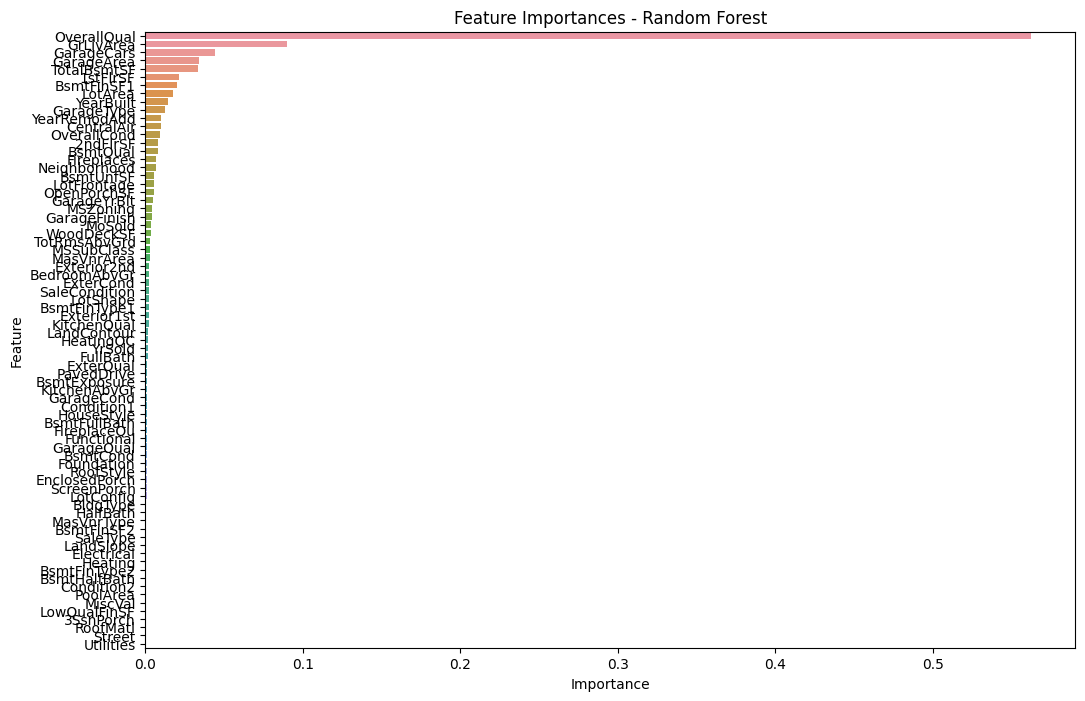

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um DataFrame com as importâncias das características
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordene o DataFrame por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie um gráfico de barras das importâncias das características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances - Random Forest')
plt.show()


In [142]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.0005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

SelectFromModel(estimator=Lasso(alpha=0.0005, random_state=0))

In [143]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print(selected_feat)

MultiIndex([(   'MSSubClass',),
            (     'MSZoning',),
            (      'LotArea',),
            (     'LotShape',),
            (  'LandContour',),
            (    'LandSlope',),
            ( 'Neighborhood',),
            (   'HouseStyle',),
            (  'OverallQual',),
            (  'OverallCond',),
            (    'YearBuilt',),
            ( 'YearRemodAdd',),
            (    'RoofStyle',),
            (     'RoofMatl',),
            (  'Exterior1st',),
            (   'MasVnrType',),
            (    'ExterQual',),
            (    'ExterCond',),
            (   'Foundation',),
            (     'BsmtQual',),
            (     'BsmtCond',),
            ( 'BsmtExposure',),
            ( 'BsmtFinType1',),
            (    'HeatingQC',),
            (   'CentralAir',),
            (     '1stFlrSF',),
            (     '2ndFlrSF',),
            (    'GrLivArea',),
            ( 'BsmtFullBath',),
            (     'FullBath',),
            (     'HalfBath',),
        

In [153]:
selected_feat = ['LotShape',
                'BldgType',
              'OverallQual',
             'YearRemodAdd',
                 'BsmtQual',
             'BsmtExposure',
             'BsmtFinType1',
                'HeatingQC',
               'CentralAir',
                 '1stFlrSF',
                'GrLivArea',
             'BsmtFullBath',
                 'FullBath',
              'KitchenQual',
               'Fireplaces',
               'GarageType',
             'GarageFinish',
               'GarageCars',
               'GarageArea',
               'PavedDrive',
            'SaleCondition']

In [146]:
X_train = X_train[selected_feat].reset_index(drop=True)

In [147]:
X_val = X_val[selected_feat].reset_index(drop=True)

In [148]:
X_train.head()

,LotShape,BldgType,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
0,1.000000,0.0,0.666667,0.333333,1.0,1.000000,1.000000,0.5,1.0,0.611511,0.571593,0.000000,0.666667,1.000000,0.333333,0.166667,1.000000,0.50,0.373766,1.0,0.8
1,1.000000,1.0,0.444444,0.916667,0.5,0.333333,0.333333,0.5,1.0,0.440991,0.412205,0.333333,0.333333,1.000000,0.000000,0.333333,0.000000,0.50,0.370240,1.0,0.8
2,1.000000,0.0,0.666667,0.983333,0.5,0.666667,0.333333,0.0,1.0,0.312818,0.541985,0.000000,0.666667,0.666667,0.000000,0.166667,1.000000,0.50,0.433004,1.0,0.8
3,0.000000,0.0,0.888889,0.933333,0.0,1.000000,1.000000,0.0,1.0,0.658648,0.615654,0.000000,0.666667,0.000000,0.333333,0.166667,0.000000,0.75,0.555712,1.0,0.8
4,0.333333,0.0,0.666667,0.766667,0.5,0.000000,0.333333,0.0,1.0,0.342798,0.567147,0.333333,0.666667,0.666667,0.333333,0.166667,0.666667,0.50,0.387870,1.0,0.8


In [149]:
X_val.head()

,LotShape,BldgType,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
0,1.0,0.0,0.500,0.883333,1.0,1.000000,0.333333,1.0,1.0,0.444598,0.363924,0.0,0.333333,1.000000,0.000000,0.166667,0.666667,0.25,0.189928,1.0,0.8
1,0.0,0.0,0.750,0.750000,0.0,0.000000,0.333333,0.0,1.0,0.633552,0.772953,0.5,0.666667,0.666667,0.666667,0.166667,0.666667,0.50,0.512230,1.0,0.8
2,1.0,0.0,0.375,0.000000,1.0,1.000000,1.000000,0.5,1.0,0.423367,0.346545,0.0,0.333333,1.000000,0.333333,0.833333,1.000000,0.50,0.258993,1.0,0.8
3,1.0,0.0,0.500,0.000000,1.0,1.000000,0.000000,0.0,1.0,0.410229,0.565843,0.0,0.666667,1.000000,0.666667,0.833333,1.000000,0.50,0.302158,1.0,0.8
4,0.0,0.0,0.875,0.966667,0.0,0.333333,0.333333,0.0,1.0,0.676369,0.553638,0.5,0.666667,0.000000,0.333333,0.166667,0.000000,0.75,0.656115,1.0,0.8


# MODELO

In [150]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn import metrics


# 2. Regularização (Regressão Ridge)
ridge_model = Ridge(alpha=1.0)  # Experimente diferentes valores para alpha
ridge_model.fit(X_train, y_train)

# 5. Validação Cruzada
ridge_scores = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

# Avaliação no conjunto de validação
ridge_predictions = ridge_model.predict(X_val)
ridge_mae = metrics.mean_absolute_error(y_val, ridge_predictions)
ridge_mse = metrics.mean_squared_error(y_val, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = ridge_model.score(X_val, y_val)

# Exibição dos resultados
print("Regressão Ridge:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)
print("Cross-validated RMSE:", np.mean(ridge_rmse_scores))


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

Regressão Ridge:
MAE: 0.12313418144709316
MSE: 0.024129222944112905
RMSE: 0.15533583921334093
R2 Score: 0.8577654898958804
Cross-validated RMSE: 0.1463302250382082


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [151]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Ajuste de hiperparâmetros usando pesquisa aleatória
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.001, 0.002, 0.03],
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [50, 100, 200, 400],
    'reg_alpha': [0, 0.1, 0.5, 0.7],
    'reg_lambda': [0, 0.1, 0.5, 0.7],
    'colsample_bytree': [0, 0.6, 0.8, 1.0]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

random_search = RandomizedSearchCV(xg_reg, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=10, verbose=2)
random_search.fit(X_train, y_train)

# Avaliação no conjunto de validação
xg_predictions = random_search.best_estimator_.predict(X_val)
xg_mae = metrics.mean_absolute_error(y_val, xg_predictions)
xg_mse = metrics.mean_squared_error(y_val, xg_predictions)
xg_rmse = np.sqrt(xg_mse)
xg_r2 = random_search.best_estimator_.score(X_val, y_val)

# Exibição dos resultados
print("\nXGBoost Regressor:")
print("Best Parameters:", random_search.best_params_)
print("MAE:", xg_mae)
print("MSE:", xg_mse)
print("RMSE:", xg_rmse)
print("R2 Score:", xg_r2)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=100, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=400, reg_alpha=0.1, reg_lambda=0.7; total time=   0.3s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=9, n_estimators=50, reg_alpha=0.5, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=0.7; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   1.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=11, n_estimators=200, reg_alpha=0.1, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.001, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=11, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=11, n_estimators=400, reg_alpha=0, reg_lambda=0.5; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=9, n_estimators=200, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   1.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   1.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.7s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=11, n_estimators=400, reg_alpha=0.5, reg_lambda=0.1; total time=   0.8s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.1; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=400, reg_alpha=0.5, reg_lambda=0; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.7, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5, reg_lambda=0.1; total time=   0.0s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.03, max_depth=5, n_estimators=200, reg_alpha=0.7, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=11, n_estimators=50, reg_alpha=0.5, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=11, n_estimators=400, reg_alpha=0.7, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, reg_alpha=0.5, reg_lambda=0.7; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.6s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.5s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=400, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0.1, reg_lambda=0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.7, reg_lambda=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.002, max_depth=7, n_estimators=50, reg_alpha=0, reg_lambda=0.5; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.3s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.6, learning_rate=0.002, max_depth=7, n_estimators=200, reg_alpha=0.1, reg_lambda=0.5; total time=   0.2s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=200, reg_alpha=0, reg_lambda=0.5; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.0s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.002, max_depth=5, n_estimators=50, reg_alpha=0.7, reg_lambda=0.1; total time=   0.1s

XGBoost Regressor:
Best Parameters: {'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
MAE: 0.14287519512156385
MSE: 0.03341213678858219
RMSE: 0.18278987058527665
R2 Score: 0.8030455054991604


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [281]:
kaggle_predictions = random_search.best_estimator_.predict(test[selected_feat])


In [282]:
predictions = np.expm1(kaggle_predictions)

In [284]:
results = pd.concat([test['Id'], pd.Series(predictions, name="SalePrice")], axis=1)
results


,Id,SalePrice
0,1461,203638.546875
1,1462,209377.468750
2,1463,224629.531250
3,1464,228207.203125
4,1465,208830.078125
...,...,...
1454,2915,204405.156250
1455,2916,187050.125000
1456,2917,241680.781250
1457,2918,201582.453125


## PYTORCH

In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

In [298]:
# Criando um DataLoader para facilitar o treinamento
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [324]:
class LinearRegressionModel(nn.Module):
   def __init__(self, input_size):
       super(LinearRegressionModel, self).__init__()
       self.linear1 = nn.Linear(input_size, 10)
       self.linear2 = nn.Linear(10, 1)

   def forward(self, x):
       x = F.relu(self.linear1(x))
       return self.linear2(x)


In [325]:
# Configurando o modelo, função de perda (loss) e otimizador
input_size = X_train_tensor.shape[1]
model = LinearRegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [329]:
# Treinando o modelo
num_epochs = 6000

# Listas para armazenar valores de RMSE
train_rmse_list = []
val_rmse_list = []

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Avaliando o modelo no conjunto de treinamento
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor)
        train_rmse = np.sqrt(train_loss.item())
        train_rmse_list.append(train_rmse)

    # Avaliando o modelo no conjunto de validação
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_rmse = np.sqrt(val_loss.item())
        val_rmse_list.append(val_rmse)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training RMSE: {train_rmse}, Validation RMSE: {val_rmse}')

# Avaliando o modelo final no conjunto de teste (ou conjunto de validação, dependendo do caso)
model.eval()
with torch.no_grad():
    test_outputs = model(X_val_tensor)
    test_rmse = np.sqrt(criterion(test_outputs, y_val_tensor).item())
    print(f'Final Validation RMSE: {test_rmse}')

predictions = test_outputs.numpy()


Epoch 1/6000, Training RMSE: 2.35837184977896, Validation RMSE: 2.3608818042580526
Epoch 2/6000, Training RMSE: 2.3586435763190425, Validation RMSE: 2.3611646521487835
Epoch 3/6000, Training RMSE: 2.3586146664268495, Validation RMSE: 2.3611386004574295
Epoch 4/6000, Training RMSE: 2.35811596555013, Validation RMSE: 2.3606332619512123
Epoch 5/6000, Training RMSE: 2.35764345203895, Validation RMSE: 2.3601662022855274
Epoch 6/6000, Training RMSE: 2.3576813739087954, Validation RMSE: 2.3602082252777405
Epoch 7/6000, Training RMSE: 2.3574775998941506, Validation RMSE: 2.360007094033134
Epoch 8/6000, Training RMSE: 2.3577770354357352, Validation RMSE: 2.360289541683616
Epoch 9/6000, Training RMSE: 2.357530188422823, Validation RMSE: 2.360041341096242
Epoch 10/6000, Training RMSE: 2.357453327869868, Validation RMSE: 2.359962844879433
Epoch 11/6000, Training RMSE: 2.35722121401591, Validation RMSE: 2.3597224908052348
Epoch 12/6000, Training RMSE: 2.3569717799274796, Validation RMSE: 2.35947332